In [6]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib
import scipy.stats as stats

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

## t 검정 : 모집단 분산 정보가 없다

In [ ]:
표본: 20명의 벤처기업경영자 
    혈압평균 135, 표준편차 25

일반인의 혈압평균 115 인경우
벤처기업경영자의 혈압이 일반인보다 높은지 아닌지를 검정하시요.
(양측검정) 95% 입니다.

In [19]:
rv = stats.norm(0, 1)
t_score = (135 - 115) / (25 / math.sqrt(20))
p_value = 1 - rv.cdf(t_score)
p_value # 0.025보다 작으므로 귀무가설 기각 대립가설 채택!

0.00017330967556727916

In [21]:
rv    = stats.norm( 0, 1 )
mu    = 115
n     = 20
xbar  = 135
sigma = 25
p     = 1 - rv.cdf( (math.sqrt( n )*( xbar - mu ) / sigma) )
alpha = 0.05
if p < alpha/2:
    print('reject H0')
else:
    print('not reject H0')
p

reject H0


0.00017330967556727916

## t검정
- 평균에 대한 가설검정
- 표본평균이 모집단 평균과 동일한지 여부
- 모집단에 대한 분산 정보가 없다
- 모집단의 분산이 같다는 가정 하에 함

$$
\begin{align}
 t= \dfrac{ \bar{x} - \mu }{ \dfrac{ s }{ \sqrt{n} } } 
\end{align}
$$
$ \bar{x} 는 표본평균 $ <br>
$ \mu 는 모집단 평균 $ <br>
$ s 는 표본의 표준편차 $ <br>
$ n 는 표본의 크기 $ <br>
$ n 는 표본의 크기 $ <br>$  표본평균의 표준편차(표준오차) $ <br>

### 1-Sample T-test(단일 표본 t-검정)
전체 학생들 중 20명의 학생들을 추려 키를 재서 전체 학생들의 평균 키가 
175cm인지 아닌지 알아보고 싶다.<br>
 귀무 가설: 학생들의 평균 키가 175cm이다.<br>
 대립 가설: 학생들의 평균 키가 175cm가 아니다.


In [3]:
np.random.seed(1)
height = 180+ np.random.normal(0, 5, 20 )

In [4]:
height

array([188.12172682, 176.94121793, 177.35914124, 174.63515689,
       184.32703815, 168.49230652, 188.72405882, 176.1939655 ,
       181.59519548, 178.75314812, 187.31053969, 169.69929645,
       178.38791398, 178.07972823, 185.66884721, 174.50054366,
       179.13785896, 175.61070791, 180.21106873, 182.91407607])

In [11]:
# stats.ttest_1samp

tTestResult = stats.ttest_1samp(height, 175)
print('p-value :', tTestResult.pvalue)

p-value : 0.00277711459981648


### Unpaired T-test(독립 표본 t-검정):서로 다른 두 집단
집단 1과 집단 2에서 각각 20명의 학생들을 추려, 각 집단의 키가 같은지, 
다른지 알아보고 싶다.<br>
- 귀무 가설: 두 집단의 평균 키는 같다.
- 대립 가설: 두 집단의 평균 키는 같지 않다.(양측 검정)

독립표본
- 등분산 가정 두집단
- 이분산 가정 두집단
- 등분산여부는 F검정으로 확인

In [16]:
np.random.seed(1)
group1Heights = 170 + np.random.normal(0, 5, 20 )
group2Heights = 175 + np.random.normal(0, 10, 20 )

In [17]:
group1Heights

array([178.12172682, 166.94121793, 167.35914124, 164.63515689,
       174.32703815, 158.49230652, 178.72405882, 166.1939655 ,
       171.59519548, 168.75314812, 177.31053969, 159.69929645,
       168.38791398, 168.07972823, 175.66884721, 164.50054366,
       169.13785896, 165.61070791, 170.21106873, 172.91407607])

In [18]:
group2Heights

array([163.99380823, 186.4472371 , 184.01590721, 180.02494339,
       184.00855949, 168.16272141, 173.77109774, 165.64230566,
       172.3211192 , 180.30355467, 168.08339248, 171.03246473,
       168.128273  , 166.54794359, 168.28753869, 174.87335401,
       163.82689651, 177.34415698, 191.59802177, 182.42044161])

In [22]:
# 등분산 가정

r1 = stats.ttest_ind( group1Heights, group2Heights)
print(r1.pvalue) # 두 집단 평균키는 같지 않다

Ttest_indResult(statistic=-2.329449625074386, pvalue=0.025249639899591222)

In [23]:
# 이분산 가정 :  equal_var=False 인자를 주기

r1 = stats.ttest_ind( group1Heights, group2Heights, equal_var=False)
print(r1.pvalue) # 두 집단 평균키는 같지 않다

0.025992343643634945


### Paired T-test(짝을 이룬 집단의 평균차이 검정)

In [25]:
np.random.seed(1)

#before treatment : mean 60, standard deviation 5
beforeWeights = [60 + np.random.normal(0, 5) for _ in range(20)]
#after treatment : mean 0.99-fold decrease, standard deviation 0.02
afterWeights = [w * np.random.normal(0.99, 0.02) for w in beforeWeights]

In [26]:
beforeWeights

[68.1217268183162,
 56.94121793174962,
 57.359141238682724,
 54.63515688921915,
 64.3270381466234,
 48.492306515598585,
 68.7240588210824,
 56.19396549552449,
 61.59519548028549,
 58.75314812261295,
 67.31053968522487,
 49.69929645251173,
 58.38791397993246,
 58.07972822665792,
 65.66884721167719,
 54.500543663429845,
 59.13785896224782,
 55.61070791039314,
 60.21106873357797,
 62.914076068579114]

In [27]:
afterWeights

[65.94098797171107,
 57.67544499710449,
 57.819839215935254,
 54.63788246116392,
 64.84275566541605,
 47.34427263203588,
 67.86790793112998,
 54.58033393455883,
 60.64923115285458,
 58.78881770728494,
 65.70631311881824,
 48.80793606499072,
 57.001583230054315,
 56.517144665313666,
 64.13055954741337,
 53.94173367626836,
 57.224973536332286,
 55.315321289307555,
 61.60772730564428,
 63.218635763189475]

In [28]:
t2 = stats.ttest_rel(beforeWeights, afterWeights)
print(t2.pvalue) # 차이가 있다

0.008871163766572827


## 카이제곱검정
- 카이제곱 분포에 기초한 통계적 방법
- 관찰된 빈도가 기대빈도와 의미있게 다른지의 여부를 검증하기 위해 사용되는 검증방법
- 자료가 빈도로 주어졌을 때, 특히 명목척도 자료의 분석에 이용
- 질적자료와 질적자료간에 서로 통계적으로 관계가 있는지 판단하는 검정
- 단일표본의 모집단이 정규분포를 따르며 분산을 미리 알고 있는 경우에 적용된다.


In [29]:
from pandas import DataFrame

xo, xe = [324, 78, 261], [371, 80, 212]
xc = DataFrame([xo, xe], columns=['Item A', 'Item B', 'Item C'], 
               index=['관찰', '기대'])
xc

,Item A,Item B,Item C
관찰,324,78,261
기대,371,80,212


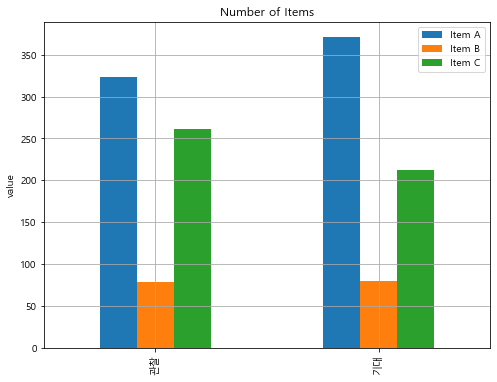

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = xc.plot(kind='bar', title='Number of Items', figsize=(8, 6))
ax.set_ylabel('value')
plt.grid(color='darkgray')
plt.show()

In [32]:
xo # 관찰치

[324, 78, 261]

In [33]:
xe # 기대치

[371, 80, 212]

In [34]:
from scipy.stats import chisquare

result = chisquare(xo, f_exp=xe)
result.pvalue # 대립가설을 채택 # 관찰과 기대빈도는 다르다

0.00017254977751013492

## F검정
#### 등분산성 여부를 검정

In [36]:
#남녀의 영어 성적에 대한 분산 분석
from scipy.stats import f_oneway
boy = np.array( [46,47,58,47,27,58,56,26,47,25] )
girl= np.array( [78,57,31,28,67,77,36,57,36,57] )

# 영화의 광고 전후에 대한 선호도
bf = np.array([11,14,18,21,26,28,37,45,48,60,64] )
af = np.array([13,15,17,18,19,23,25,28,29,36,37])

print( f_oneway( boy, girl) ) # 분산이 같다
print( f_oneway( bf, af) ) # 분산이 같다

F_onewayResult(statistic=1.4591624718860445, pvalue=0.24269553293319618)
F_onewayResult(statistic=2.835186691980833, pvalue=0.10776455501678371)
